In [82]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [83]:
X_train -= X_train.mean(axis=0)
X_train /= X_train.std(axis=0)

X_test -= X_train.mean(axis=0)
X_test /= X_train.std(axis=0)

In [84]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.random.set_seed(9)


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 32)                448       
                                                                 
 dense_44 (Dense)            (None, 16)                528       
                                                                 
 dense_45 (Dense)            (None, 1)                 17        
                                                                 
Total params: 993 (3.88 KB)
Trainable params: 993 (3.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [86]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
13/13 [==============================] - 0s 4ms/step - loss: 593.9249 - mse: 593.9249 - val_loss: 3597.5491 - val_mse: 3597.5491
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 570.4873 - mse: 570.4873 - val_loss: 1282.9508 - val_mse: 1282.9508
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 547.6553 - mse: 547.6553 - val_loss: 334.8042 - val_mse: 334.8042
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 523.8637 - mse: 523.8637 - val_loss: 185.4024 - val_mse: 185.4024
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 495.8967 - mse: 495.8967 - val_loss: 1703.6918 - val_mse: 1703.6918
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 461.8143 - mse: 461.8143 - val_loss: 6384.9639 - val_mse: 6384.9639
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 421.3007 - mse: 421.3007 - val_loss: 16926.4961 - val_mse: 16926.4961
Epoch 8/50
13/13 [====

In [87]:
history.history

{'loss': [593.9248657226562,
  570.4873046875,
  547.6552734375,
  523.8637084960938,
  495.896728515625,
  461.8143310546875,
  421.3006591796875,
  375.4257507324219,
  323.22906494140625,
  269.27435302734375,
  215.61595153808594,
  164.7423553466797,
  124.68131256103516,
  95.57422637939453,
  76.30353546142578,
  62.970523834228516,
  53.31145477294922,
  46.268775939941406,
  40.557472229003906,
  36.25092697143555,
  32.825462341308594,
  30.210596084594727,
  28.095922470092773,
  26.334436416625977,
  25.065086364746094,
  23.862672805786133,
  22.829795837402344,
  22.031057357788086,
  21.25643539428711,
  20.54506492614746,
  19.9412899017334,
  19.462486267089844,
  18.937660217285156,
  18.46727180480957,
  18.05684471130371,
  17.6212100982666,
  17.305316925048828,
  16.857892990112305,
  16.56439208984375,
  16.239641189575195,
  15.9313383102417,
  15.61671257019043,
  15.387434005737305,
  15.170071601867676,
  14.87390422821045,
  14.641307830810547,
  14.49267578

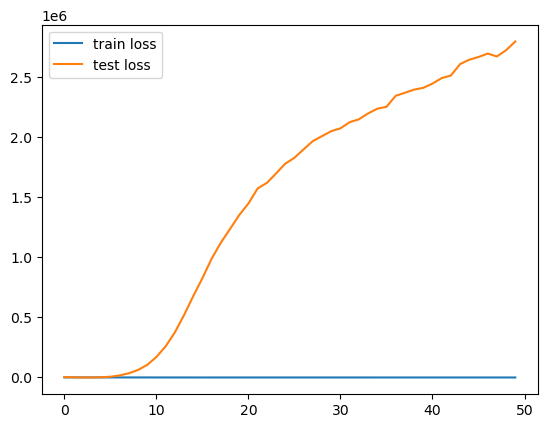

In [88]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend();

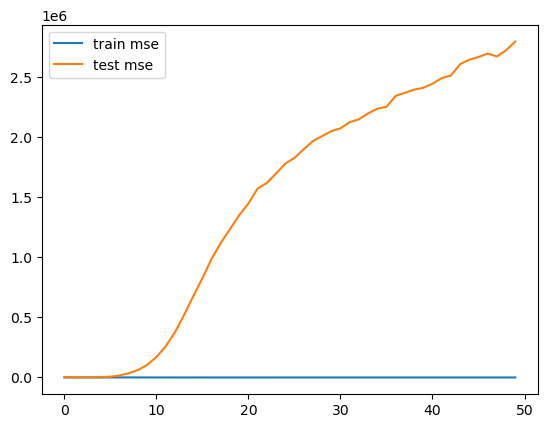

In [89]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='test mse')
plt.legend();

In [98]:
from keras import callbacks

model_checkpoint = callbacks.ModelCheckpoint(filepath='model_best_{epoch}.h5',
                                             monitor='val_mse',
                                             verbose=1,
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='auto',
                                             save_freq='epoch')

In [99]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [100]:
model.fit(X_train, y_train,
          epochs=5,
          validation_data=(X_test, y_test),
          callbacks=[model_checkpoint])

Epoch 1/5
 1/13 [=>............................] - ETA: 1s - loss: 8.3448 - mse: 8.3448
Epoch 1: val_mse improved from inf to 3216429.75000, saving model to model_best_1.h5
13/13 [==============================] - 0s 5ms/step - loss: 11.0606 - mse: 11.0606 - val_loss: 3216429.7500 - val_mse: 3216429.7500
Epoch 2/5
 1/13 [=>............................] - ETA: 0s - loss: 9.2388 - mse: 9.2388
Epoch 2: val_mse improved from 3216429.75000 to 3163795.25000, saving model to model_best_2.h5
13/13 [==============================] - 0s 2ms/step - loss: 10.8373 - mse: 10.8373 - val_loss: 3163795.2500 - val_mse: 3163795.2500
Epoch 3/5
 1/13 [=>............................] - ETA: 0s - loss: 9.1355 - mse: 9.1355
Epoch 3: val_mse improved from 3163795.25000 to 3116499.75000, saving model to model_best_3.h5
13/13 [==============================] - 0s 2ms/step - loss: 10.7531 - mse: 10.7531 - val_loss: 3116499.7500 - val_mse: 3116499.7500
Epoch 4/5
 1/13 [=>............................] - ETA: 0s - l

/Users/andrewermak/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [101]:
early_stop = callbacks.EarlyStopping(monitor='val_loss',
                                     min_delta=0,
                                     patience=2,
                                     verbose=1,
                                     mode='auto',
                                    #  baseline=0.006,
                                     restore_best_weights=True)


model.fit(X_train, y_train,
          epochs=10,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/10
13/13 [==============================] - 0s 3ms/step - loss: 10.4300 - mse: 10.4300 - val_loss: 3172567.0000 - val_mse: 3172567.0000
Epoch 2/10
13/13 [==============================] - 0s 1ms/step - loss: 10.3481 - mse: 10.3481 - val_loss: 3180250.0000 - val_mse: 3180250.0000
Epoch 3/10
13/13 [==============================] - 0s 1ms/step - loss: 10.3200 - mse: 10.3200 - val_loss: 3134590.7500 - val_mse: 3134590.7500
Epoch 4/10
13/13 [==============================] - 0s 1ms/step - loss: 10.1502 - mse: 10.1502 - val_loss: 3141039.2500 - val_mse: 3141039.2500
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 10.1522 - mse: 10.1522 - val_loss: 3195927.2500 - val_mse: 3195927.2500
Epoch 5: early stopping


In [102]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [104]:
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_mae',
                                        factor=0.1,
                                        patience=0,
                                        verbose=1,
                                        mode='auto',
                                        min_delta=0,
                                        cooldown=2,
                                        min_lr=1e-10)

model.fit(X_train, y_train,
          epochs=20,
          validation_data=(X_test, y_test),
          callbacks=[reduce_lr])

Epoch 1/20
13/13 [==============================] - 0s 2ms/step - loss: 9.7618 - mae: 2.2121 - val_loss: 3163900.5000 - val_mae: 1747.0579 - lr: 1.0000e-06
Epoch 2/20
13/13 [==============================] - 0s 1ms/step - loss: 9.7617 - mae: 2.2121 - val_loss: 3163880.2500 - val_mae: 1747.0521 - lr: 1.0000e-06
Epoch 3/20
13/13 [==============================] - 0s 1ms/step - loss: 9.7617 - mae: 2.2121 - val_loss: 3163818.0000 - val_mae: 1747.0350 - lr: 1.0000e-06
Epoch 4/20
13/13 [==============================] - 0s 1ms/step - loss: 9.7615 - mae: 2.2121 - val_loss: 3163748.7500 - val_mae: 1747.0156 - lr: 1.0000e-06
Epoch 5/20
13/13 [==============================] - 0s 1ms/step - loss: 9.7615 - mae: 2.2121 - val_loss: 3163744.0000 - val_mae: 1747.0140 - lr: 1.0000e-06
Epoch 6/20
13/13 [==============================] - 0s 1ms/step - loss: 9.7614 - mae: 2.2120 - val_loss: 3163681.2500 - val_mae: 1746.9954 - lr: 1.0000e-06
Epoch 7/20
13/13 [==============================] - 0s 1ms/step 

In [105]:
import keras

class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print(f"Starting training; got log keys: {keys}")

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print(f"Stop training; got log keys: {keys}")

    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print(f"Start epoch {epoch} of training; got log keys: {keys}")

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print(f"End epoch {epoch} of training; got log keys: {keys}")

    def on_test_begin(self, logs=None):
        keys = list(logs.keys())
        print(f"Start testing; got log keys: {keys}")

    def on_test_end(self, logs=None):
        keys = list(logs.keys())
        print(f"Stop testing; got log keys: {keys}")

    def on_train_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print(f"...Training: start of batch {batch}; got log keys: {keys}")

    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print(f"...Training: end of batch {batch}; got log keys: {keys}")

    def on_test_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print(f"...Evaluating: start of batch {batch}; got log keys: {keys}")

    def on_test_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print(f"...Evaluating: end of batch {batch}; got log keys: {keys}")

In [106]:
model.fit(X_train, y_train,
          epochs=1,
          validation_data=(X_test, y_test),
          callbacks=[CustomCallback()],
          verbose=0);

Starting training; got log keys: []
Start epoch 0 of training; got log keys: []
...Training: start of batch 0; got log keys: []
...Training: end of batch 0; got log keys: ['loss', 'mae']
...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'mae']
...Training: start of batch 2; got log keys: []
...Training: end of batch 2; got log keys: ['loss', 'mae']
...Training: start of batch 3; got log keys: []
...Training: end of batch 3; got log keys: ['loss', 'mae']
...Training: start of batch 4; got log keys: []
...Training: end of batch 4; got log keys: ['loss', 'mae']
...Training: start of batch 5; got log keys: []
...Training: end of batch 5; got log keys: ['loss', 'mae']
...Training: start of batch 6; got log keys: []
...Training: end of batch 6; got log keys: ['loss', 'mae']
...Training: start of batch 7; got log keys: []
...Training: end of batch 7; got log keys: ['loss', 'mae']
...Training: start of batch 8; got log keys: []
...Training: end